## Model simulation: nitrobenzene model

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

In [1]:
# Importing python libraries
import sys
import os
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Layout

%load_ext autoreload
%autoreload 1

# We import all of our functions prepared in advanced
sys.path.append("../functions")
%aimport general_functions
%aimport nitrobenzene
function_derivatives = nitrobenzene.model_derivatives

#Check Python version
print(sys.version)


3.9.15 (main, Nov 24 2022, 14:39:17) [MSC v.1916 64 bit (AMD64)]


## Model simulation

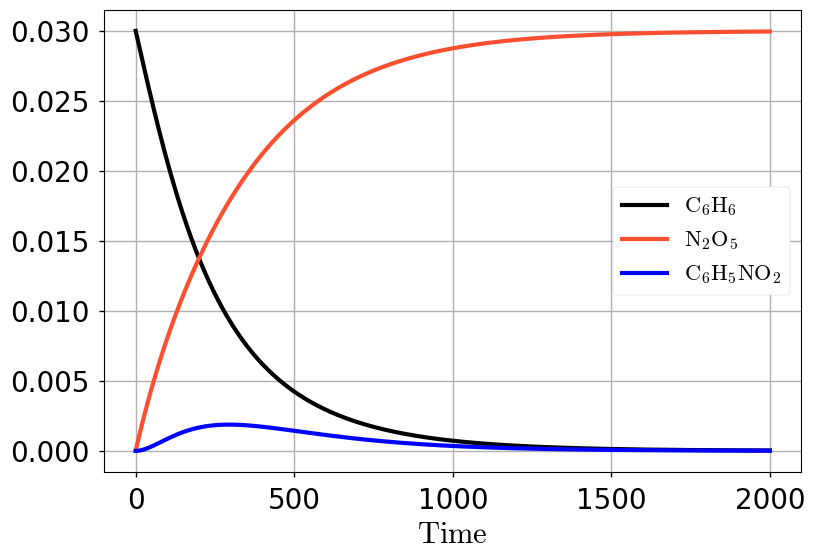

In [2]:
# Initial conditions
C6H6_init    = 0.03
N2O5_init    = 0
C6H5NO2_init = 0

df = general_functions.model(
    np.arange(0, 2000, 1),      # Time steps
    [C6H6_init, 
    N2O5_init, 
    C6H5NO2_init],              # Initial conditions
    [r'$\mathrm{C_6H_6}$',
    r'$\mathrm{N_2O_5}$', 
    r'$\mathrm{C_6H_5NO_2}$'],  # Variable names
    function_derivatives,       # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    k=2, Q=10, V=3000, C6H6_in=0, N2O5_in=0.03)

plt.show()

## Cumulative mass of product at the outlet

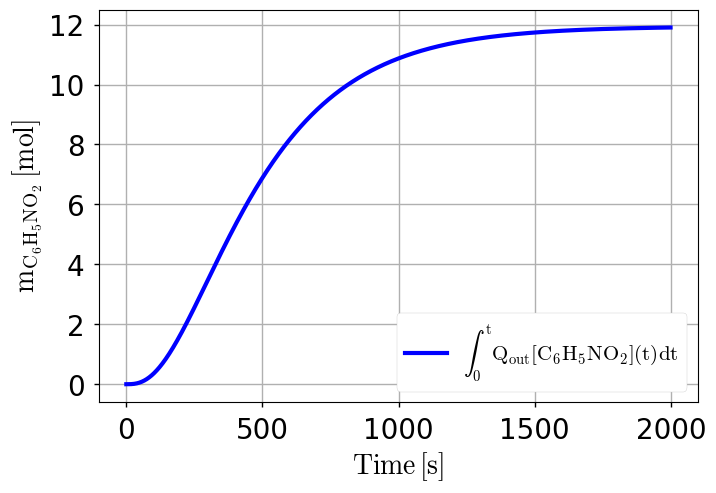

In [45]:
fig = plt.figure(figsize=(7.5,5))
fig.subplots_adjust(hspace=0.2, wspace = 0.3)
ax = fig.add_subplot(111) 
delta_t = df.index[:].values[1] - df.index[:].values[0]
# We peform numerical integration through quadrature and plot the numerical cumulative sum vs time
plot1 = ax.plot(df.index[:].values, np.cumsum(df[r'$\mathrm{C_6H_5NO_2}$']*delta_t*10),'b-',label=r'$\mathrm{\int^{t}_0 Q_{out}[C_6H_5NO_2](t)dt }$') 

# Plot settings
ax.set_xlabel(r'$\mathrm{Time\/[s]}$', fontsize=20)
ax.set_ylabel(r'$\mathrm{m_{C_6H_5NO_2}\/[mol] }$', fontsize=20)
ax.legend(loc='best',fontsize=15, framealpha=1)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
ax.grid(True)

plt.show()

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

## Impact of initial conditions and inlet $N_2O_5$

In [3]:
def interactive_model(C6H6, N2O5, C6H5NO2):
    general_functions.model(
        np.arange(0, 1500, 1),  # Time steps
        [C6H6, N2O5, C6H5NO2],  # Initial conditions
        [r'$\mathrm{C_6H_6}$',  # Variable names
        r'$\mathrm{N_2O_5}$',   
        r'$\mathrm{C_6H_5NO_2}$'], 
        function_derivatives,   # Function derivatives
        returnDataFrame=True, plotresults=True,
        # Specify parameter values
        k=2, Q=10, V=3000, C6H6_in=0, N2O5_in=0.03)
        
interact(interactive_model,
         C6H6=FloatSlider(value=0.03, min=0, max=0.1, step=0.01, 
         description='C6H6', continuous_update=False),
         N2O5=FloatSlider(value=0, min=0, max=0.1, step=0.01, 
         description='N2O5', continuous_update=False),
         C6H5NO2=FloatSlider(value=0.03, min=0, max=0.1, step=0.01, 
         description='C6H5NO2', continuous_update=False),
         N2O5_in=FloatSlider(value=0.03, min=0, max=0.1, step=0.01, 
         description='N2O5_inlet', continuous_update=False));

interactive(children=(FloatSlider(value=0.03, continuous_update=False, description='C6H6', max=0.1, step=0.01)…

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

## Impact of kinetic coefficient and flow parameters

In [8]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 1500, 1)), # Time steps
         init=fixed([0.03, 0, 0]),               # Initial conditions
         varnames=fixed([r'$\mathrm{C_6H_6}$',   # Variable names
         r'$\mathrm{N_2O_5}$', 
         r'$\mathrm{C_6H_5NO_2}$']), 
         f=fixed(function_derivatives),          # Function derivatives
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(False),
         # Specify parameter values
         C6H6_in=fixed(0), N2O5_in=fixed(0.03),
         k=FloatSlider(value=1, min=0., max=10, step=0.1,
         description='k', continuous_update=False),
         Q=FloatSlider(value=10, min=0., max=20, step=1, 
         description='Q', continuous_update=False),
         V=FloatSlider(value=1500, min=0., max=6000, step=100,
         description='V', continuous_update=False));

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='k', max=10.0), FloatSlider(…

$$\frac{d[C_6H_6]}{dt}= -2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}( [C_6H_6])$$
$$\frac{d[N_2O_5]}{dt}= -k{[C_6H_6]}^2[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[C_6H_5NO_2]}{dt}= 2k{[C_6H_6]}^2[N_2O_5] - \frac{Q}{V}[C_6H_5NO_2] $$

## Sensitivity analysis of the nitrobenzene model

In [6]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 1500, 1)), # Time steps
    init=fixed([0.03, 0, 0]),               # Initial conditions
    varnames=fixed([r'$\mathrm{C_6H_6}$',   # Variable names
    r'$\mathrm{N_2O_5}$',
     r'$\mathrm{C_6H_5NO_2}$']), 
    f=fixed(function_derivatives),          # Function derivatives
    parametername=ToggleButtons(options=['k', 'Q', 'V', 'C6H6_in', 'N2O5_in']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    k=fixed(2), Q=fixed(10), V=fixed(3000), C6H6_in=fixed(0), N2O5_in=fixed(0.03));


interactive(children=(ToggleButtons(description='parametername', options=('k', 'Q', 'V', 'C6H6_in', 'N2O5_in')…